# PROJET 2 : ANALYSEZ DES DONNÉES DE SYSTÈMES ÉDUCATIFS

## 0 - PRÉALABLES :

### A - Gestion des avertissements :

In [1]:
# Suppression des avertissements :
import warnings
warnings.filterwarnings('ignore')

### B - Importation des librairies

In [2]:
# Importation des librairies :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy import stats as st
from sklearn import preprocessing, decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### C - Importation des fichiers :

In [3]:
# Importations des fichiers :
EdStatsCountry = pd.read_csv("EdStatsCountry.csv")
EdStatsCountrySeries = pd.read_csv("EdStatsCountry-Series.csv")
EdStatsData = pd.read_csv("EdStatsData.csv")
EdStatsFootNote = pd.read_csv("EdStatsFootNote.csv")
EdStatsSeries = pd.read_csv("EdStatsSeries.csv")

## I - APERÇU DES FICHIERS :

### A - EdStatsCountry :

#### 1) Aperçu du fichier EdStatsCountry :

In [4]:
# Aperçu du fichier EdStatsCountry :
EdStatsCountry.head(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


#### 2) Nombre de lignes et de colonnes de EdStatsCountry :

In [5]:
# Nombre de lignes et de colonnes de EdStatsCountry :
EdStatsCountry.shape

(241, 32)

#### 3) Aperçu des variables de EdStatsCountry :

In [6]:
# Aperçu des variables de EdStatsCountry :
EdStatsCountry.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

#### 4) Aperçu du volume d'informations manquantes sur EdStatsCountry :

<AxesSubplot:>

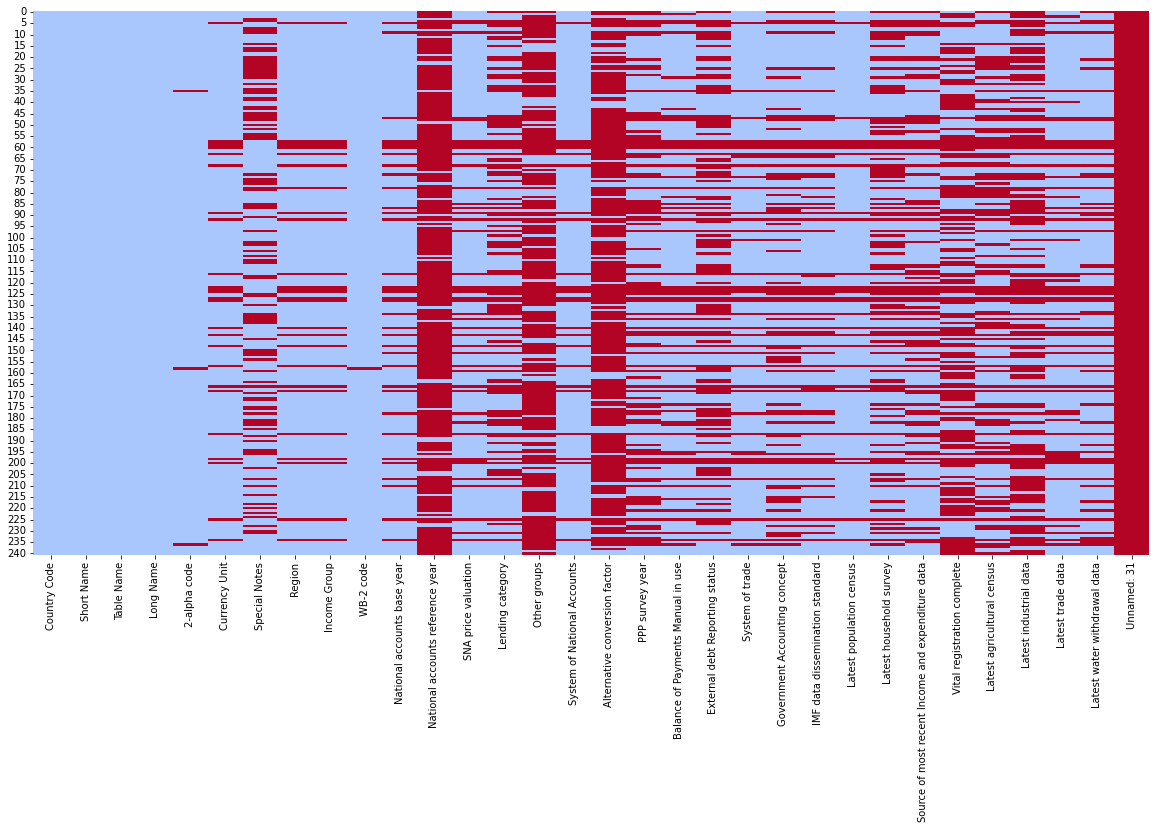

In [7]:
# Aperçu du volume d'informations manquantes sur EdStatsCountry :
plt.figure(figsize=(20,10))
sns.heatmap(EdStatsCountry.isna(), cbar=False, cmap="coolwarm", center=0.25)

#### 5) Aperçu du volume d'informations duppliquées sur EdStatsCountry :

In [8]:
# Aperçu du volume d'informations duppliquées sur EdStatsCountry :
EdStatsCountry.duplicated().sum()

0

#### 6) Conclusion quant au fichier EdStatsCountry :

### B - EdStatsCountrySeries

#### 1) Aperçu du fichier EdStatsCountrySeries :

In [9]:
# Aperçu du fichier EdStatsCountrySeries :
EdStatsCountrySeries.head(3)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


#### 2) Nombre de lignes et de colonnes du fichier EdStatsCountrySeries :

In [10]:
# Nombre de lignes et de colonnes :
EdStatsCountrySeries.shape

(613, 4)

#### 3) Aperçu des variables de EdStatsCountrySeries :

In [11]:
# Aperçu des variables de EdStatsCountrySeries :
EdStatsCountrySeries.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

#### 4) Aperçu du volume d'informations manquantes sur EdStatsCountrySeries :

<AxesSubplot:>

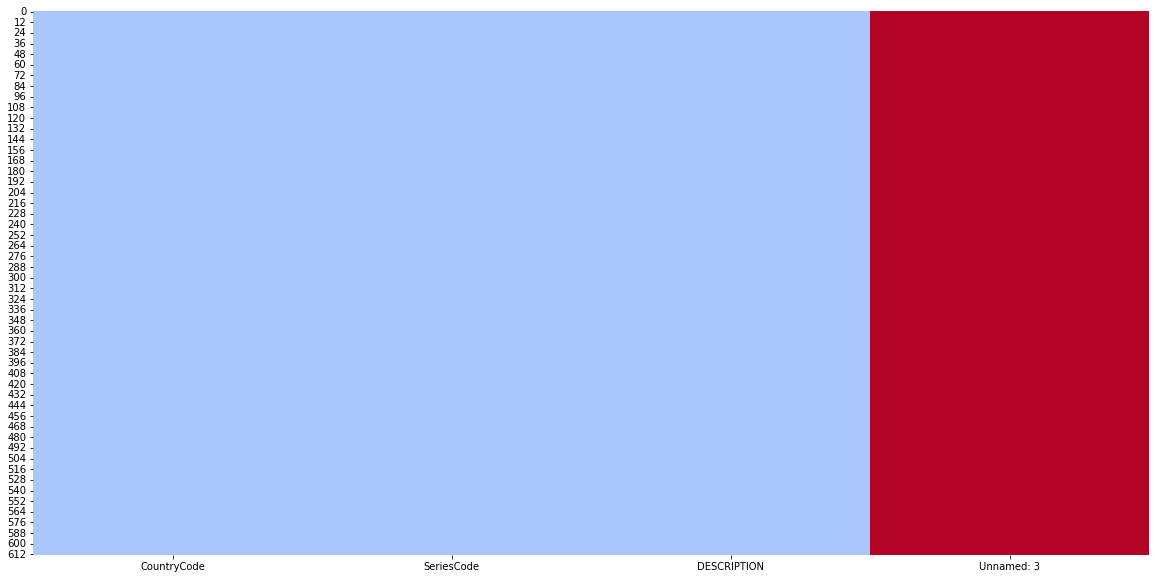

In [12]:
# Aperçu du volume d'informations manquantes sur EdStatsCountrySeries :
plt.figure(figsize=(20,10))
sns.heatmap(EdStatsCountrySeries.isna(),cbar=False, cmap="coolwarm", center=0.25)

#### 5) Volume d'informations duppliquées sur EdStatsCountrySeries :

In [13]:
# Aperçu du volume d'informations duppliquées sur EdStatsCountrySeries :
EdStatsCountrySeries.duplicated().sum()

0

#### 6) Conclusion quant au fichier EdStatsCountrySeries :

### C - EdStatsFootNote

#### 1) Aperçu du fichier EdStatsFootNote :

In [14]:
# Aperçu du fichier EdStatsFootNote :
EdStatsFootNote.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN


#### 2) Nombre de lignes et de colonnes de EdStatsFootNote :

In [15]:
# Nombre de lignes et de colonnes de EdStatsFootNote :
EdStatsFootNote.shape

(643638, 5)

#### 3) Aperçu du volume d'informations manquantes sur EdStatsFootNote :

<AxesSubplot:>

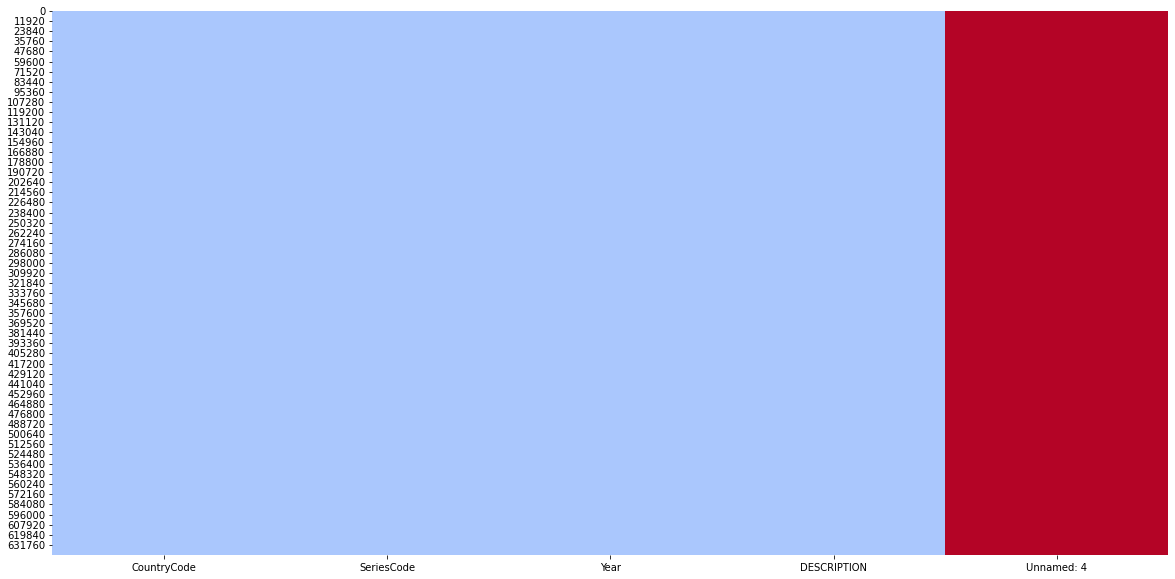

In [16]:
# Aperçu du volume d'informations manquantes sur EdStatsFootNote :
plt.figure(figsize=(20,10))
sns.heatmap(EdStatsFootNote.isna(),cbar=False, cmap="coolwarm", center=0.25)

#### 4 - Aperçu du volume d'information duppliquées sur EdStatsFootNote :

In [17]:
# Aperçu du volume d'informations duppliquées sur EdStatsFootNote :
EdStatsFootNote.duplicated().sum()

0

#### 5 - Conclusion :

### D - EdStatsSeries

#### 1 - Aperçu du fichier EdStatsSeries :

In [18]:
# Aperçu du fichier EdStatsSeries :
EdStatsSeries.head(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2) Nombre de lignes et de colonnes de EdStatsSeries :

In [19]:
# Nombre de lignes et de colonnes de EdStatsSeries :
EdStatsSeries.shape

(3665, 21)

#### 3) aperçu des variables de EdStatsSeries :

In [20]:
# Aperçu du type de variables de EdStatsSeries :
EdStatsSeries.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [21]:
# Aperçu des variables de EdStatsSeries :
EdStatsSeries.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

#### 4) Aperçu du volume d'informations manquantes sur EdStatsSeries :

<AxesSubplot:>

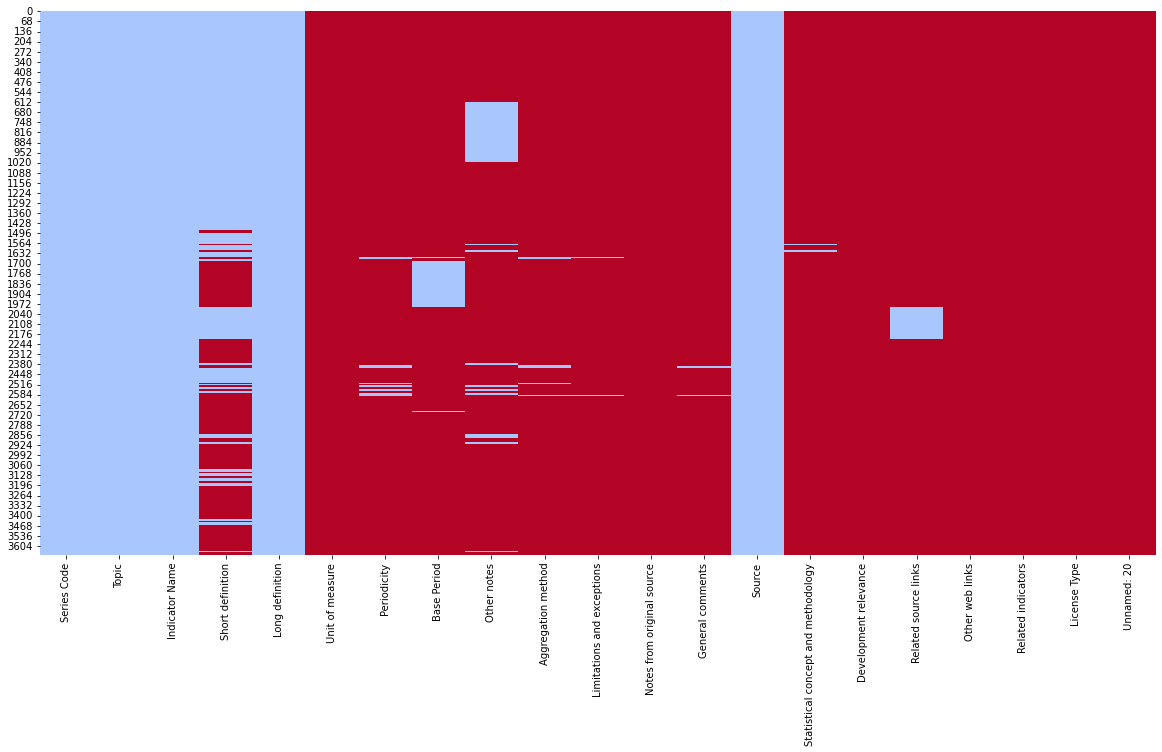

In [22]:
# Aperçu du volume d'informations manquantes sur EdStatsSeries :
plt.figure(figsize=(20,10))
sns.heatmap(EdStatsSeries.isna(),cbar=False, cmap="coolwarm", center=0.25)

#### 5 - Aperçu du volume d'informations duppliquées sur EdStatsSeries :

In [23]:
# Aperçu du volume d'informations duppliquées sur EdStatsSeries :
EdStatsSeries.duplicated().sum()

0

#### 6 - Conclusion :

### E - EdStatsData

#### 1) Aperçu du fichier EdStatsData :

In [24]:
# Aperçu du fichier EdStatsData :
EdStatsData.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2) Nombre de lignes et de colonnes de EdStatsData :

In [25]:
# Nombre de lignes et de colonnes de EdStatsData :
EdStatsData.shape

(886930, 70)

#### 3) Aperçu des variables de EdStatsData :

In [26]:
# Aperçu des variables de EdStatsData :
EdStatsData.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [27]:
# Aperçu des catégories de la variable "Indicator Name" dans EdStatsData :
EdStatsData["Indicator Name"].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

#### 4) Aperçu du volume d'informations manquantes sur EdStatsData :

<AxesSubplot:>

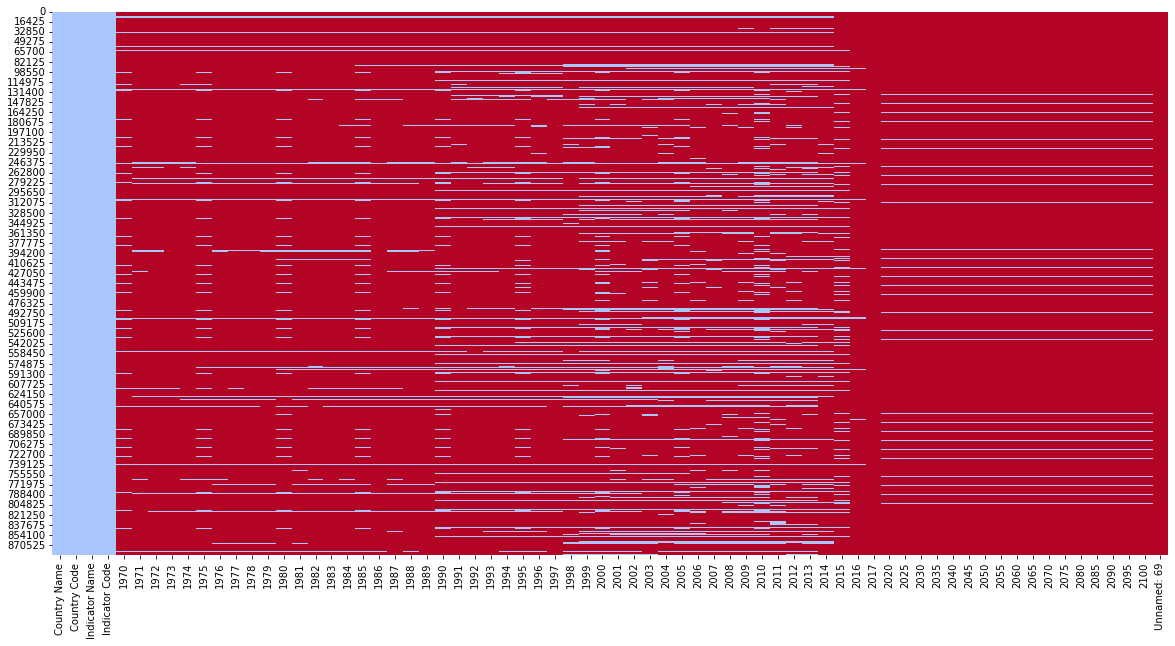

In [28]:
# Aperçu du volume d'informations manquantes sur EdStatsData :
plt.figure(figsize=(20,10))
sns.heatmap(EdStatsData.isna(),cbar=False, cmap="coolwarm", center=0.25)

#### 5) Aperçu du volume d'informations duppliquées sur EdStatsData :

In [29]:
# Aperçu du volume d'informations duppliquées sur EdStatsData :
EdStatsData.duplicated().sum()

0

#### 6) Évaluation de l'exploitabilité des données :

In [30]:
# Pourcentage de valeurs manquantes par colonnes :
pd.set_option("display.max_row",70)
(EdStatsData.isna().sum()/EdStatsData.shape[0]).sort_values(ascending=False).head()

Unnamed: 69    1.000000
2017           0.999839
2016           0.981442
1971           0.959933
1973           0.959924
dtype: float64

In [31]:
# Suppression des colonnes contenant plus de 90% de données manquantes :
EdStatsDataTest = EdStatsData[EdStatsData.columns[EdStatsData.isna().sum()/EdStatsData.shape[0] < 0.9]]
EdStatsDataTest.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1980,1985,1990,1995,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

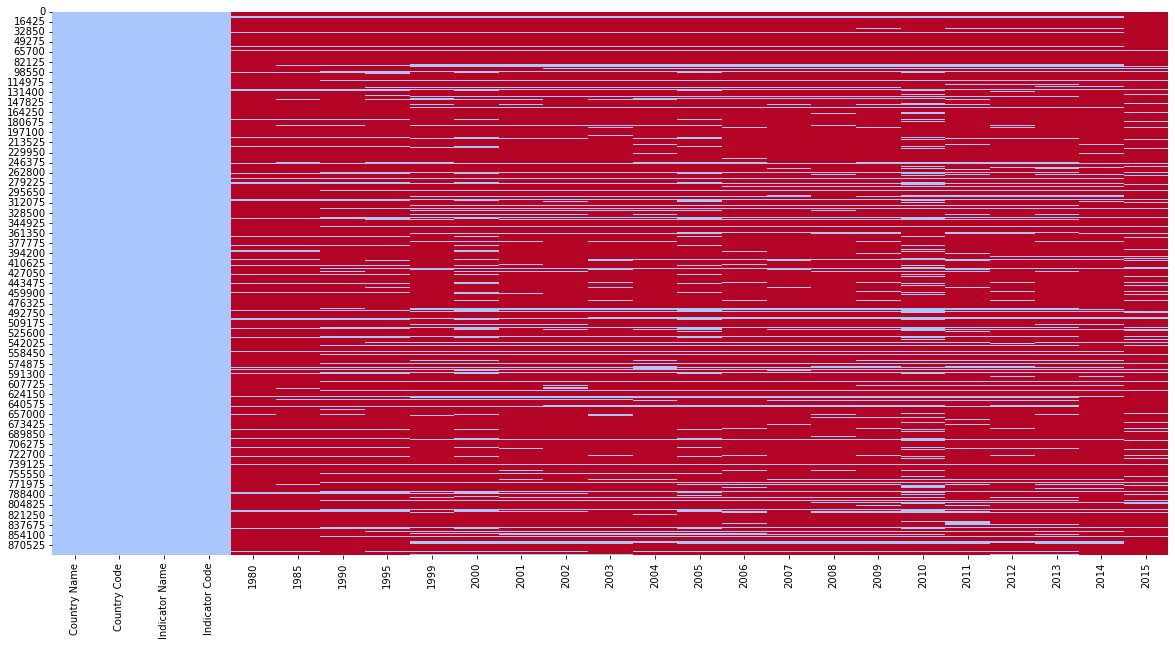

In [32]:
# Heatmap du nouveau dataframe :
plt.figure(figsize=(20,10))
sns.heatmap(EdStatsDataTest.isna(),cbar=False, cmap="coolwarm", center=0.25)

In [33]:
# Pourcentage de valeurs manquantes par ligne sur EdStatsDataTest :
(EdStatsDataTest.isna().sum(axis=1)/EdStatsData.shape[1]).sort_values()

159902    0.0
401970    0.0
401969    0.0
401968    0.0
401907    0.0
         ... 
505425    0.3
505424    0.3
505423    0.3
505437    0.3
0         0.3
Length: 886930, dtype: float64

In [34]:
# Liste des pays contenant moins de 30% d'informations manquantes :
EdStatsDataTest["Country Name"][EdStatsDataTest.isna().sum(axis=1)/EdStatsDataTest.shape[1] < 0.2]

4         Arab World
5         Arab World
6         Arab World
7         Arab World
12        Arab World
             ...    
886251      Zimbabwe
886252      Zimbabwe
886611      Zimbabwe
886612      Zimbabwe
886613      Zimbabwe
Name: Country Name, Length: 68593, dtype: object

In [35]:
# Liste des indicateurs contenant moins de 30% d'informations manquantes :
EdStatsDataTest["Indicator Name"][EdStatsDataTest.isna().sum(axis=1)/EdStatsDataTest.shape[1] < 0.2]

4         Adjusted net enrolment rate, primary, both sex...
5          Adjusted net enrolment rate, primary, female (%)
6         Adjusted net enrolment rate, primary, gender p...
7            Adjusted net enrolment rate, primary, male (%)
12        Adjusted net intake rate to Grade 1 of primary...
                                ...                        
886251    Theoretical duration of secondary education (y...
886252    Theoretical duration of upper secondary educat...
886611       Unemployment, female (% of female labor force)
886612           Unemployment, male (% of male labor force)
886613         Unemployment, total (% of total labor force)
Name: Indicator Name, Length: 68593, dtype: object

In [36]:
# Suppression des lignes contenant moins de 20% de données manquantes :
EdStatsDataTest2 = EdStatsDataTest[EdStatsDataTest.isna().sum(axis=1)/EdStatsData.shape[1] < 0.2]
EdStatsDataTest2.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1980,1985,1990,1995,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,65.617767,69.033211,71.995819,71.811760,76.254318,77.245682,...,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,56.486790,61.520870,65.827492,65.761559,72.047287,73.275620,...,79.608330,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.759440,0.806770,0.844660,0.847310,0.897370,0.904060,...,0.929620,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN


<AxesSubplot:>

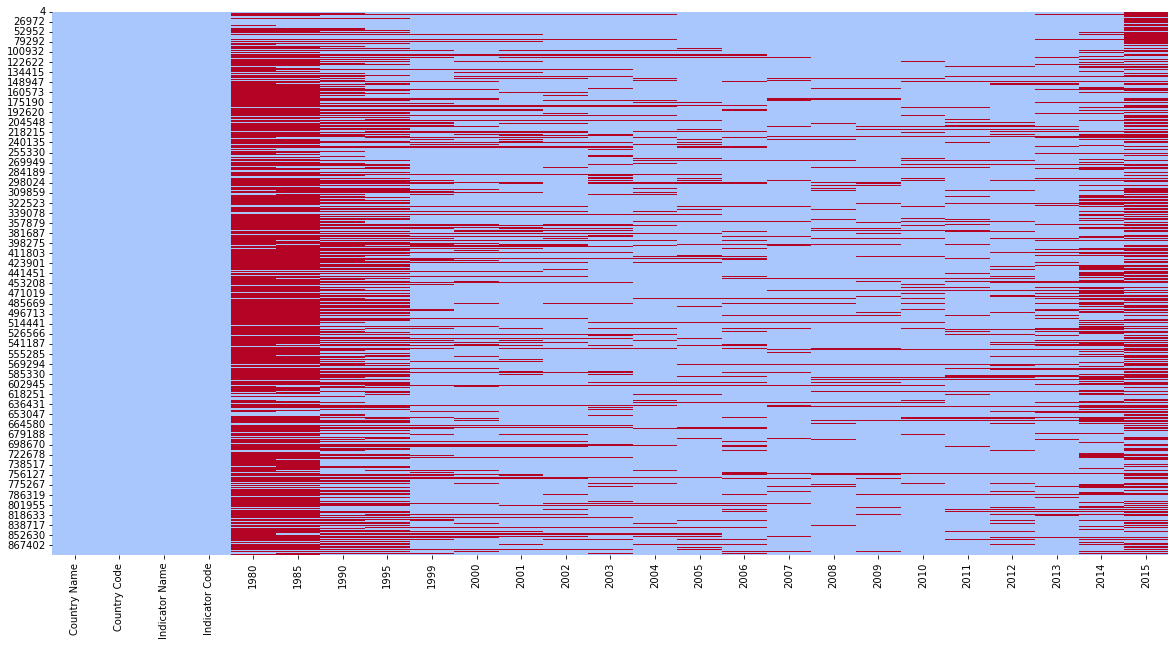

In [37]:
# Heatmap du nouveau dataframe :
plt.figure(figsize=(20,10))
sns.heatmap(EdStatsDataTest2.isna(),cbar=False, cmap="coolwarm", center=0.25)

In [38]:
# Derniers affinages et évaluation du dataframe :
EdStatsDataTest3 = EdStatsDataTest2.drop(columns=["1980","1985","1990","1995"])
EdStatsDataTest3.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,...,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,72.047287,73.275620,75.132980,76.641022,77.653580,78.485397,...,79.608330,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.897370,0.904060,0.912750,0.919790,0.926300,0.927680,...,0.929620,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN


<AxesSubplot:>

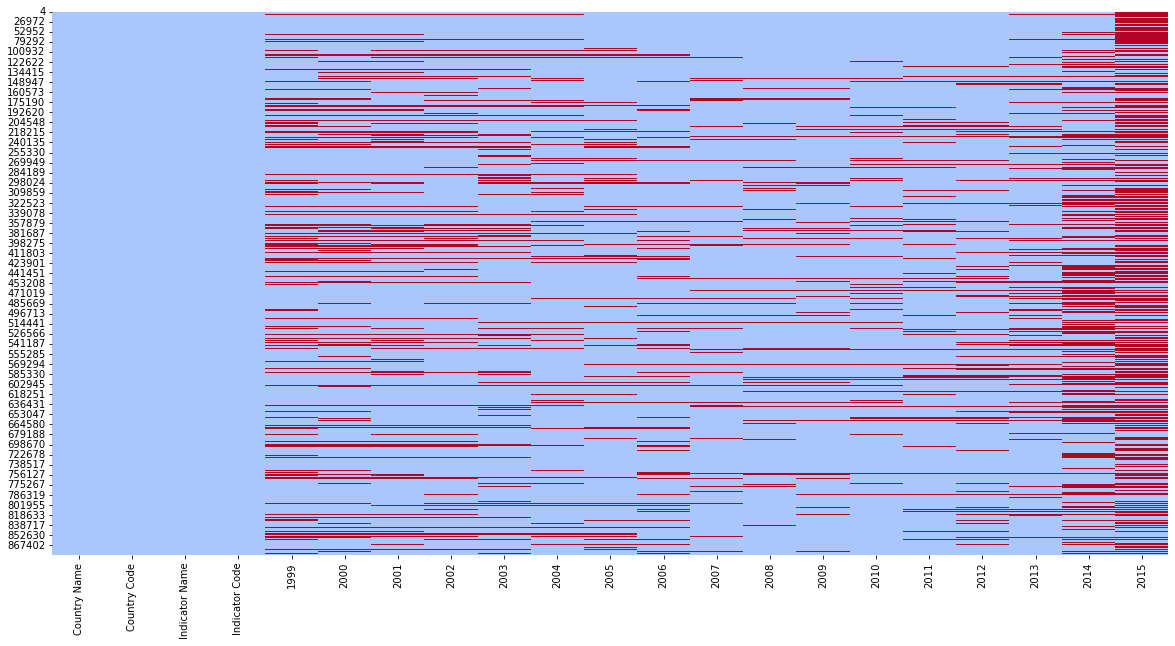

In [39]:
# Heatmap du dataframe final :
plt.figure(figsize=(20,10))
sns.heatmap(EdStatsDataTest3.isna(),cbar=False, cmap="coolwarm", center=0.25)

In [40]:
# Taille du dataframe final:
EdStatsDataTest3.shape

(132107, 21)

In [41]:
# Volume d'informations manquantes :
EdStatsDataTest3.isna().sum().sum()/EdStatsDataTest3.count().sum()

0.14650149808864552

In [42]:
# Liste des régions et pays renseignés :
EdStatsDataTest3["Country Name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [43]:
# Nombre de régions et pays renseignés :
len(EdStatsDataTest3["Country Name"].unique())

242

In [44]:
# Liste des indicateurs renseignés :
EdStatsDataTest3["Indicator Name"].unique()

array(['Adjusted net enrolment rate, primary, both sexes (%)',
       'Adjusted net enrolment rate, primary, female (%)',
       'Adjusted net enrolment rate, primary, gender parity index (GPI)',
       ...,
       'Drop-out rate from Grade 5 of lower secondary general education, both sexes (%)',
       'Drop-out rate from Grade 5 of lower secondary general education, female (%)',
       'Drop-out rate from Grade 5 of lower secondary general education, male (%)'],
      dtype=object)

In [45]:
# Nombre d'indicateurs renseignés' :
len(EdStatsDataTest3["Indicator Name"].unique())

1175

#### 7) Conclusion :

## II - PRÉ-EXPLORATION DES DONNÉES :

### A - Préparation d'un Dataframe pour l'exploration de données :

#### 1 - Suppression des régions :

In [46]:
# définition des régions :
regions = list(set(EdStatsCountry["Region"].dropna()))

# suppression des régions
EdStatsDataCountry = EdStatsDataTest3[-EdStatsDataTest3["Country Name"].isin(regions)]

#### 2 - Ajout des régions en tant que variable :

In [47]:
# Jointure de l'indicateur de région présent dans EdStatsCountry.
regionsV = EdStatsCountry[["Country Code", "Region"]]
EdStatsDataCountry2 = EdStatsDataCountry.merge(regionsV, how="left", on="Country Code")
EdStatsDataCountry2.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Region
0,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,...,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,72.047287,73.275620,75.132980,76.641022,77.653580,78.485397,...,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.897370,0.904060,0.912750,0.919790,0.926300,0.927680,...,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN,NaN


#### 3 - Ajout de la moyenne des 16 dernières années :

In [48]:
# Moyenne des 16 dernières années :
EdStatsDataCountry2["Moyenne"] = EdStatsDataCountry2.mean(axis=1, numeric_only=True).round()
EdStatsDataCountry2.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,Region,Moyenne
0,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,...,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN,82.0
1,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,72.047287,73.275620,75.132980,76.641022,77.653580,78.485397,...,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,NaN,80.0
2,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.897370,0.904060,0.912750,0.919790,0.926300,0.927680,...,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN,NaN,1.0


#### 4 - Réorganisation du dataframe

In [49]:
# Transformation en Tableau pivot :
data = pd.pivot_table(EdStatsDataCountry2, values=["1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","Moyenne"], index=["Country Name","Country Code","Region"], columns="Indicator Name")
data.head(3)

1999  \
Indicator Name                                       Adjusted net enrolment rate, lower secondary, both sexes (%)   
Country Name Country Code Region                                                                                    
Afghanistan  AFG          South Asia                                                                NaN             
Albania      ALB          Europe & Central Asia                                                     NaN             
Algeria      DZA          Middle East & North Africa                                                NaN             

                                                                                                               \
Indicator Name                                       Adjusted net enrolment rate, lower secondary, female (%)   
Country Name Country Code Region                                                                                
Afghanistan  AFG          South Asia                                                                NaN         
Albania      ALB          Europe & Central Asia                                                     NaN         
Algeria      DZA          Middle East & North Africa                                                NaN         

                                                                                                                              \
Indicator Name                                       Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
Country Name Country Code Region                                                                                               
Afghanistan  AFG          South Asia                                                                NaN                        
Albania      ALB          Europe & Central Asia                                                     NaN                        
Algeria      DZA          Middle East & North Africa                                                NaN                        

                                                                                                             \
Indicator Name                                       Adjusted net enrolment rate, lower secondary, male (%)   
Country Name Country Code Region                                                                              
Afghanistan  AFG          South Asia                                                                NaN       
Albania      ALB          Europe & Central Asia                                                     NaN       
Algeria      DZA          Middle East & North Africa                                                NaN       

                                                                                                           \
Indicator Name                                       Adjusted net enrolment rate, primary, both sexes (%)   
Country Name Country Code Region                                                                            
Afghanistan  AFG          South Asia                                                                NaN     
Albania      ALB          Europe & Central Asia                                               97.314247     
Algeria      DZA          Middle East & North Africa                                          89.725533     

                                                                                                       \
Indicator Name                                       Adjusted net enrolment rate, primary, female (%)   
Country Name Country Code Region                                                                        
Afghanistan  AFG          South Asia                                                              NaN   
Albania      ALB          Europe & Central Asia                                             95.921532   
Algeria      DZA          Middle East & North Africa                                        87.784210   

     

In [50]:
# Requête sur data en multi-indexing : 
data.xs("2012", level=0, axis=1).head(3)

,,Indicator Name,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net enrolment rate, upper secondary, both sexes (%)","Adjusted net enrolment rate, upper secondary, female (%)",...,"Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)","Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
Country Name,Country Code,Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,South Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,ALB,Europe & Central Asia,NaN,NaN,NaN,NaN,96.137093,95.353287,0.98445,96.85965,NaN,NaN,...,14.3,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,DZA,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.6,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Requête sur variable en multi-indexing : 
data.xs("Enrolment in upper secondary education, both sexes (number)", level=1, axis=1).head(3)

,,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Moyenne
Country Name,Country Code,Region,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,South Asia,NaN,NaN,159952.0,NaN,115583.0,173356.0,190104.0,271144.0,285290.0,361193.0,443002.0,567344.0,743405.0,881415.0,969267.0,968769.0,NaN,471525.0
Albania,ALB,Europe & Central Asia,102161.0,104946.0,110996.0,122555.0,132932.0,142449.0,156015.0,164572.0,173269.0,177572.0,132803.0,140657.0,150134.0,152182.0,154425.0,151937.0,NaN,141850.0
Algeria,DZA,Middle East & North Africa,938291.0,934128.0,994347.0,1066937.0,1134161.0,1209247.0,1216378.0,1240225.0,1040181.0,1062959.0,1112148.0,1306432.0,1332584.0,NaN,NaN,NaN,NaN,1122155.0


In [52]:
# Requête sur une région :
data.xs("Europe & Central Asia", axis=0, level=2, drop_level=False).head(3)

1999  \
Indicator Name                                  Adjusted net enrolment rate, lower secondary, both sexes (%)   
Country Name Country Code Region                                                                               
Albania      ALB          Europe & Central Asia                                                NaN             
Andorra      AND          Europe & Central Asia                                                NaN             
Armenia      ARM          Europe & Central Asia                                                NaN             

                                                                                                          \
Indicator Name                                  Adjusted net enrolment rate, lower secondary, female (%)   
Country Name Country Code Region                                                                           
Albania      ALB          Europe & Central Asia                                                NaN         
Andorra      AND          Europe & Central Asia                                                NaN         
Armenia      ARM          Europe & Central Asia                                                NaN         

                                                                                                                         \
Indicator Name                                  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
Country Name Country Code Region                                                                                          
Albania      ALB          Europe & Central Asia                                                NaN                        
Andorra      AND          Europe & Central Asia                                                NaN                        
Armenia      ARM          Europe & Central Asia                                                NaN                        

                                                                                                        \
Indicator Name                                  Adjusted net enrolment rate, lower secondary, male (%)   
Country Name Country Code Region                                                                         
Albania      ALB          Europe & Central Asia                                                NaN       
Andorra      AND          Europe & Central Asia                                                NaN       
Armenia      ARM          Europe & Central Asia                                                NaN       

                                                                                                      \
Indicator Name                                  Adjusted net enrolment rate, primary, both sexes (%)   
Country Name Country Code Region                                                                       
Albania      ALB          Europe & Central Asia                                          97.314247     
Andorra      AND          Europe & Central Asia                                                NaN     
Armenia      ARM          Europe & Central Asia                                                NaN     

                                                                                                  \
Indicator Name                                  Adjusted net enrolment rate, primary, female (%)   
Country Name Country Code Region                                                                   
Albania      ALB          Europe & Central Asia                                        95.921532   
Andorra      AND          Europe & Central Asia                                              NaN   
Armenia      ARM          Europe & Central Asia                                              NaN   

                                                                                                                 \
Indicator Name                                  Adjusted net enro

#### 5 - Ordre de grandeur statistique sur les grandes régions (2014) :

In [53]:
# Moyenne de lycéens par région (2014) :
meanRegion = data.groupby("Region").mean()
meanRegion.loc[:,("2014","Enrolment in upper secondary education, both sexes (number)")]

Region
East Asia & Pacific           4.132899e+06
Europe & Central Asia         6.292769e+05
Latin America & Caribbean     5.944794e+05
Middle East & North Africa    7.734185e+05
North America                 5.869252e+06
South Asia                    1.787736e+06
Sub-Saharan Africa            4.488635e+05
Name: (2014, Enrolment in upper secondary education, both sexes (number)), dtype: float64

In [54]:
# Médiane du nombre de lycéens par par région (2014) :
medianRegion = data.groupby("Region").median()
medianRegion.loc[:,("2014","Enrolment in upper secondary education, both sexes (number)")]

Region
East Asia & Pacific            202466.0
Europe & Central Asia          311359.0
Latin America & Caribbean      231149.5
Middle East & North Africa     142063.0
North America                 5869251.5
South Asia                    1152182.0
Sub-Saharan Africa             163786.0
Name: (2014, Enrolment in upper secondary education, both sexes (number)), dtype: float64

In [55]:
# Écart type du nombre de lycéens par région (2014) :
stdRegion = data.groupby("Region").std(ddof=1)
stdRegion.loc[:,("2014","Enrolment in upper secondary education, both sexes (number)")]

Region
East Asia & Pacific           1.168078e+07
Europe & Central Asia         9.370822e+05
Latin America & Caribbean     1.050222e+06
Middle East & North Africa    1.380262e+06
North America                 8.297281e+06
South Asia                    2.099805e+06
Sub-Saharan Africa            7.914385e+05
Name: (2014, Enrolment in upper secondary education, both sexes (number)), dtype: float64

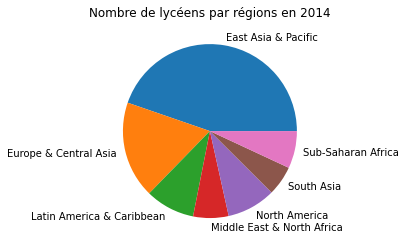

In [56]:
# Part du nombre de lycéens par région (2014) :
plt.figure()
plt.pie(data.groupby("Region").sum().loc[:,("2014","Enrolment in upper secondary education, both sexes (number)")], labels= meanRegion.index)
plt.title("Nombre de lycéens par régions en 2014")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

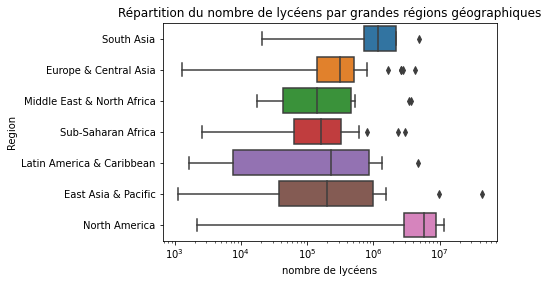

In [57]:
# Répartition du nombre de lycéens par région (log):
lycRegion = EdStatsDataCountry2[EdStatsDataCountry2["Indicator Name"]=="Enrolment in upper secondary education, both sexes (number)"]
lycRegion

plt.figure()
sns.boxplot(x=lycRegion["2014"].fillna(lycRegion.mean()), y=lycRegion["Region"])
plt.title("Répartition du nombre de lycéens par grandes régions géographiques")
plt.xlabel("nombre de lycéens")
plt.xscale("log")
plt.show

### B - Préparation d'un dataset pour une pré-exploration :

#### 1 - Choix de variables :

In [58]:
# Liste des variables :
data.xs("Moyenne", level=0, axis=1).columns

Index(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       'Adjusted net enrolment rate, lower secondary, male (%)',
       'Adjusted net enrolment rate, primary, both sexes (%)',
       'Adjusted net enrolment rate, primary, female (%)',
       'Adjusted net enrolment rate, primary, gender parity index (GPI)',
       'Adjusted net enrolment rate, primary, male (%)',
       'Adjusted net enrolment rate, upper secondary, both sexes (%)',
       'Adjusted net enrolment rate, upper secondary, female (%)',
       ...
       'Unemployment, male (% of male labor force)',
       'Unemployment, total (% of total labor force)',
       'Youth illiterate population, 15-24 years, % female',
       'Youth illiterate population, 15-24 years, both sexes (number)',
       'Youth illiterate population, 15-24 years, female (number)',
    

#### 2 - Constitution du dataset d'exploration :

In [59]:
# Création de la variable "Évolution lycéens"
evoLyc = EdStatsDataCountry2[EdStatsDataCountry2["Indicator Name"]=="Enrolment in upper secondary education, both sexes (number)"]
evoLyc["2008"].fillna(evoLyc["2007"],inplace=True, axis=0)
evoLyc["2009"].fillna(evoLyc["2008"],inplace=True, axis=0)
evoLyc["2010"].fillna(evoLyc["2009"],inplace=True, axis=0)
evoLyc["2011"].fillna(evoLyc["2010"],inplace=True, axis=0)
evoLyc["2012"].fillna(evoLyc["2011"],inplace=True, axis=0)
evoLyc["2013"].fillna(evoLyc["2012"],inplace=True, axis=0)
evoLyc["2014"].fillna(evoLyc["2013"],inplace=True, axis=0)
evoLyc["2015"].fillna(evoLyc["2014"],inplace=True, axis=0)

evoLyc["Évolution lycéens"]=(evoLyc["2015"]-evoLyc["2010"])/evoLyc["2010"]
evoLyc = evoLyc.set_index("Country Name")

In [60]:
# Récupération des variables pour constitution d'un Dataframe d'exploration :
explo0 = data.xs("Moyenne", level=0, axis=1)
explo1 = pd.DataFrame(explo0["Enrolment in upper secondary education, both sexes (number)"])
explo2 = explo1.merge(evoLyc["Évolution lycéens"], on="Country Name")
explo3 = explo2.merge(explo0["GDP, PPP (current international $)"], on="Country Name")
explo4 = explo3.merge(explo0["Personal computers (per 100 people)"], on="Country Name")
explo = explo4.merge(explo0["Internet users (per 100 people)"], on="Country Name")

#### 3 - Aperçu du dataset d'exploration :

In [61]:
# Aperçu :
explo.head(3)

,"Enrolment in upper secondary education, both sexes (number)",Évolution lycéens,"GDP, PPP (current international $)",Personal computers (per 100 people),Internet users (per 100 people)
Country Name,,,,,
Afghanistan,471525.0,0.707551,3.997615e+10,NaN,3.0
Albania,141850.0,0.080195,2.226318e+10,2.0,25.0
Algeria,1122155.0,0.020018,4.001147e+11,1.0,11.0


In [62]:
# Describe :
explo.describe()

,"Enrolment in upper secondary education, both sexes (number)",Évolution lycéens,"GDP, PPP (current international $)",Personal computers (per 100 people),Internet users (per 100 people)
count,1.640000e+02,163.000000,1.560000e+02,112.000000,163.000000
mean,1.217438e+06,0.142592,4.693847e+11,15.544643,28.723926
std,4.444156e+06,0.396388,1.486290e+12,18.872206,22.803587
min,1.053000e+03,-0.401249,1.619006e+08,0.000000,1.000000
25%,3.910975e+04,-0.029652,1.497076e+10,2.000000,8.000000
50%,1.779970e+05,0.060983,5.122384e+10,7.500000,23.000000
75%,6.511275e+05,0.210043,2.814577e+11,19.500000,44.000000
max,4.034413e+07,3.967312,1.380811e+13,77.000000,83.000000


In [63]:
# Matrice de corrélation :
explo.corr()

,"Enrolment in upper secondary education, both sexes (number)",Évolution lycéens,"GDP, PPP (current international $)",Personal computers (per 100 people),Internet users (per 100 people)
"Enrolment in upper secondary education, both sexes (number)",1.000000,-0.040281,0.694356,-0.049025,-0.040947
Évolution lycéens,-0.040281,1.000000,-0.073542,-0.104848,-0.217910
"GDP, PPP (current international $)",0.694356,-0.073542,1.000000,0.245710,0.199891
Personal computers (per 100 people),-0.049025,-0.104848,0.245710,1.000000,0.900298
Internet users (per 100 people),-0.040947,-0.217910,0.199891,0.900298,1.000000


### C - Preprocessing :

In [64]:
# Définitions :
explo=explo.fillna(explo.mean())
X = explo.values
pays = explo.index

In [65]:
# Centrage et réduction :
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

### D - Dendrogramme :

#### 1 - Clustering hiérarchique :

In [66]:
# Clustering hiérarchique :
Z = linkage(X_scaled,"ward")

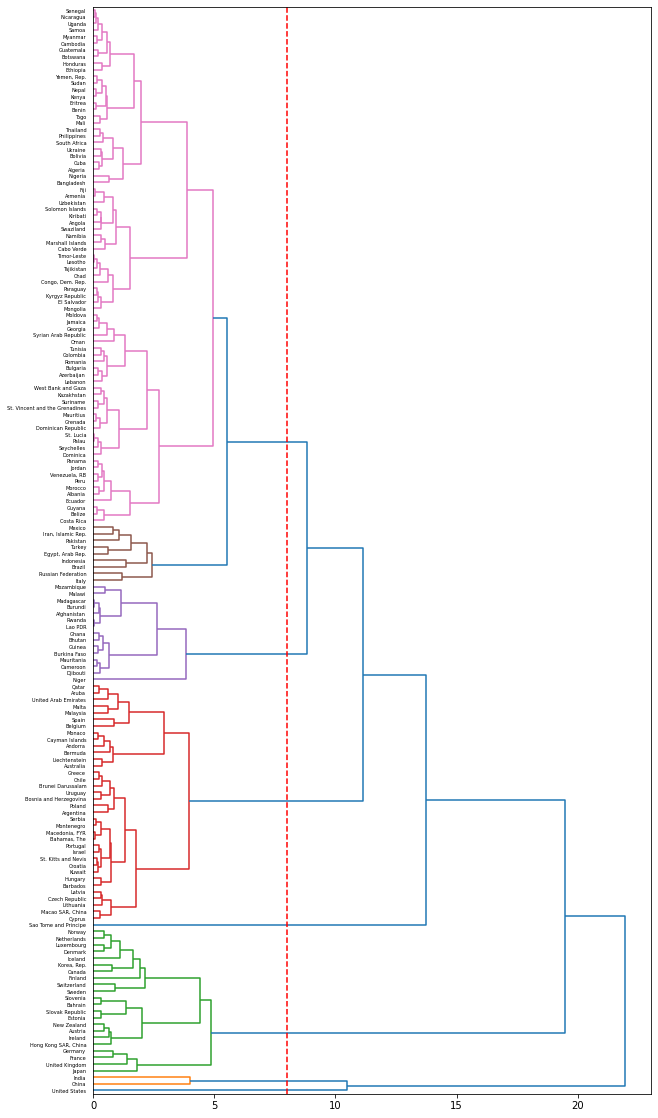

In [67]:
# Visualisation :
plt.figure(figsize=(10,20))
dendrogram(Z, labels=pays,orientation="right",color_threshold=5)
plt.axvline(c="red",linestyle='--', x=8)
plt.show()

### E - Analyse en composante principale

#### 1 - Programmes préalables :

In [68]:
# Cercle des corrélations :
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [69]:
# Éboulis des valeurs propres :
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

#### 2 - Éboulis des valeurs propres :

In [70]:
# Calcul des composantes principales :
n_comp = 5
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=5)

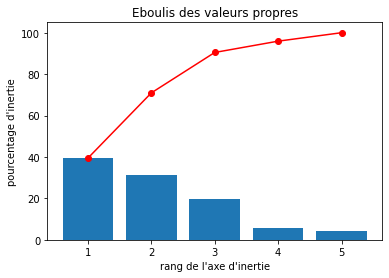

In [71]:
# Visualisation :
display_scree_plot(pca)

#### 3 - Cercle des corrélations :

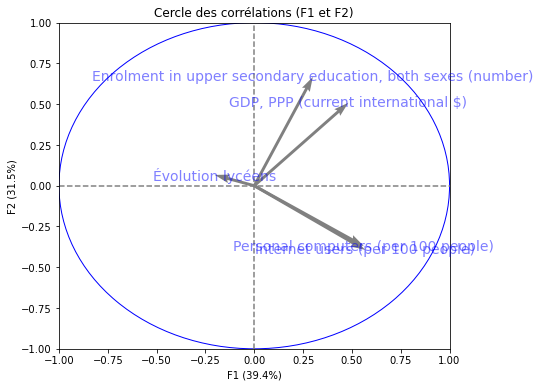

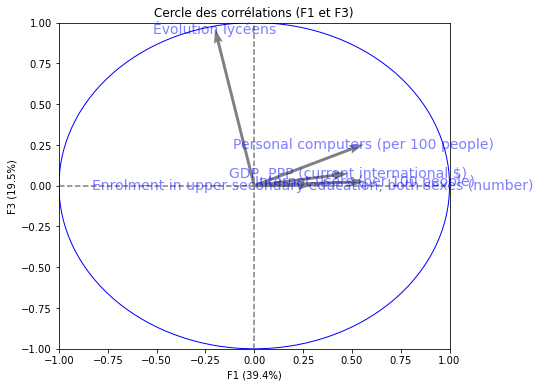

In [72]:
# Cercle des corrélations :
pcs = pca.components_
labelsVariables = explo.columns
display_circles(pcs, 3, pca,[(0,1),(0,2)],labels = np.array(labelsVariables))

#### 4 - K-Means :

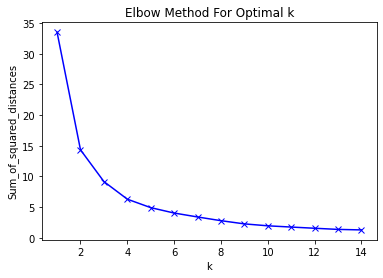

In [73]:
# Méthode du coude pour K-Means :
mms = MinMaxScaler()
mms.fit(Z)
data_transformed = mms.transform(Z)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [74]:
# Clustering :
clusters = fcluster(Z, 6, criterion="maxclust")

In [75]:
# Attribution des numéros de cluster :
dataCluster = pd.DataFrame({"Country Name": pays, "cluster":clusters})

# Jointure avec le dataframe principal :
dataCluster = pd.merge(explo, dataCluster, on="Country Name")
dataClusterMoy = dataCluster.groupby(by="cluster").mean()

#### 5 - Visualisation ACP :

In [76]:
# Preprocessing :
pca = decomposition.PCA().fit(X_scaled)
Z_projected = pca.transform(X_scaled)

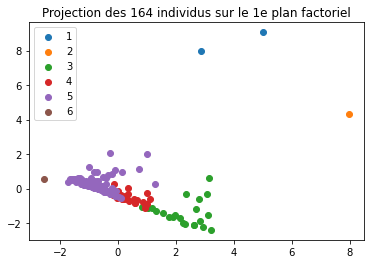

In [77]:
# Visualisation de la projection F1/F2 :
label = clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(Z_projected[label == i , 0] , Z_projected[label == i , 1] , label = i)
plt.legend(loc="upper left")
plt.title("Projection des {} individus sur le 1e plan factoriel".format(Z_projected.shape[0]))
plt.show(block=False)

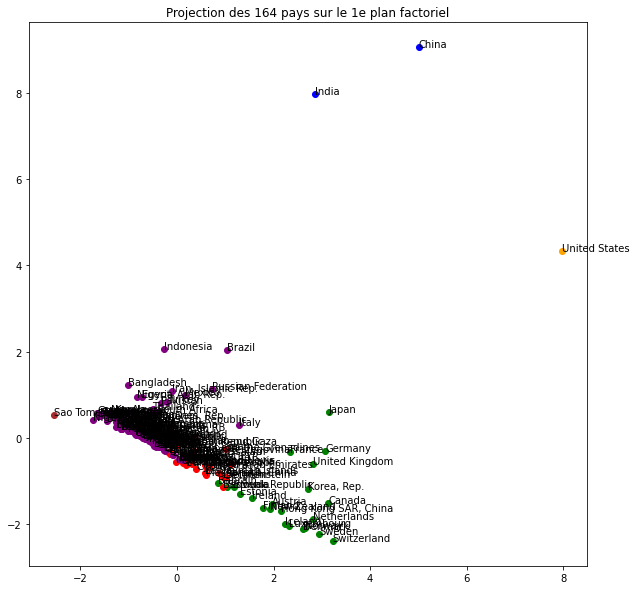

In [78]:
# Visualisation de la projection F1/F2 : (avec les noms de pays):
plt.figure(figsize=(10,10))
for couleur,k in zip(['blue','orange','green','red','purple','brown'],[1,2,3,4,5,6]):
    plt.scatter(Z_projected[clusters==k,0] , Z_projected[clusters==k,1],c=couleur)
for i,label in enumerate(explo.index):
    plt.annotate(label,(Z_projected[i,0],Z_projected[i,1]))
plt.title("Projection des {} pays sur le 1e plan factoriel".format(Z_projected.shape[0]))
plt.show()

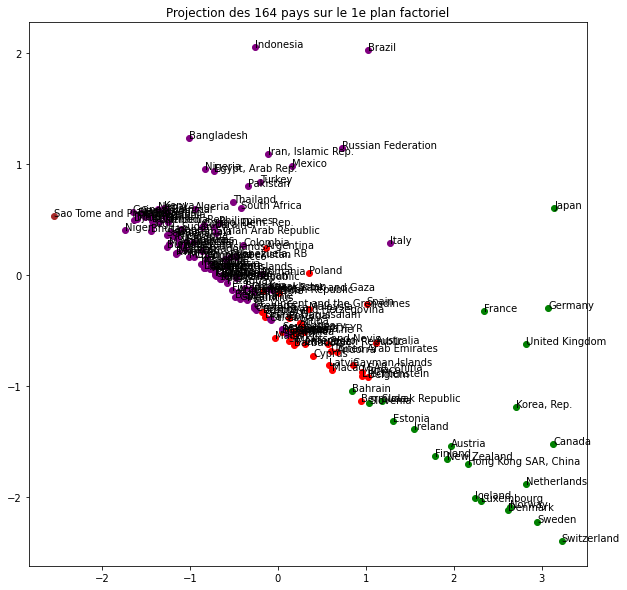

In [79]:
# Visualisation de la projection F1/F2 : (zoom sur les clusters resserrés):
plt.figure(figsize=(10,10))
for couleur,k in zip(['green','red','purple','brown'],[3,4,5,6]):
    plt.scatter(Z_projected[clusters==k,0] , Z_projected[clusters==k,1],c=couleur)
for i,label in enumerate(explo.index):
    plt.annotate(label,(Z_projected[i,0],Z_projected[i,1]))
plt.title("Projection des {} pays sur le 1e plan factoriel".format(Z_projected.shape[0]))
plt.show()

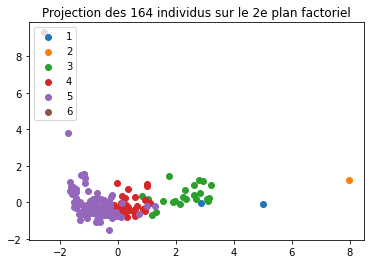

In [80]:
# Visualisation de la projection F1/F3 :
label = clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(Z_projected[label == i , 0] , Z_projected[label == i , 2] , label = i)
plt.legend(loc="upper left")
plt.title("Projection des {} individus sur le 2e plan factoriel".format(Z_projected.shape[0]))
plt.show(block=False)

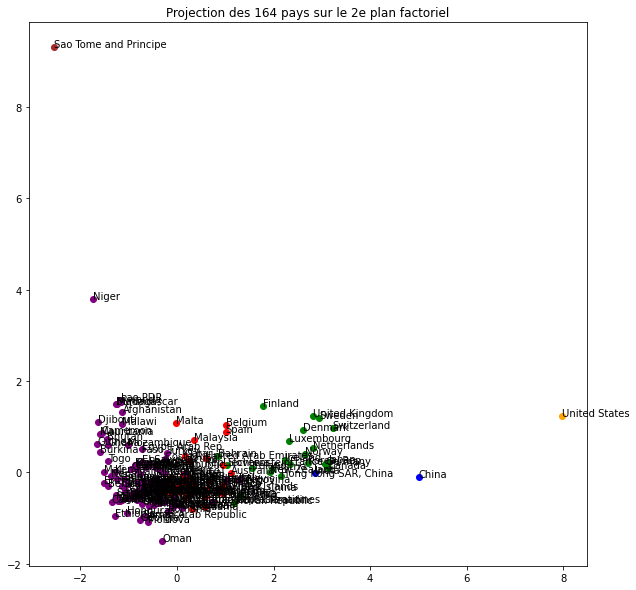

In [81]:
# Visualisation de la projection F1/F3 : (avec les noms de pays):
plt.figure(figsize=(10,10))
for couleur,k in zip(['blue','orange','green','red','purple','brown'],[1,2,3,4,5,6]):
    plt.scatter(Z_projected[clusters==k,0] , Z_projected[clusters==k,2],c=couleur)
for i,label in enumerate(explo.index):
    plt.annotate(label,(Z_projected[i,0],Z_projected[i,2]))
plt.title("Projection des {} pays sur le 2e plan factoriel".format(Z_projected.shape[0]))
plt.show()

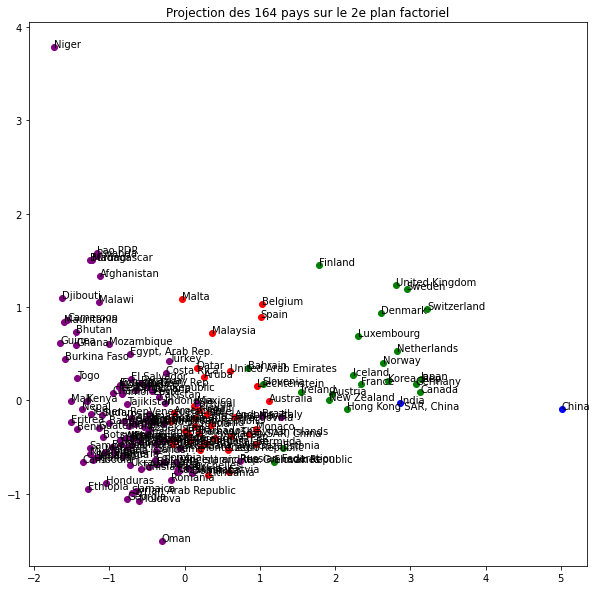

In [82]:
# Visualisation de la projection F1/F3 : (zoom sur les clusters resserrés):
plt.figure(figsize=(10,10))
for couleur,k in zip(['blue','green','red','purple'],[1,3,4,5]):
    plt.scatter(Z_projected[clusters==k,0] , Z_projected[clusters==k,2],c=couleur)
for i,label in enumerate(explo.index):
    plt.annotate(label,(Z_projected[i,0],Z_projected[i,2]))
plt.title("Projection des {} pays sur le 2e plan factoriel".format(Z_projected.shape[0]))
plt.show()

### F - Choix d'un groupe de pays :

#### 1 - Réorganisation des clusters :

In [83]:
# Réorganisation des clusters :
dataClusterB = dataCluster.drop(dataCluster[dataCluster["cluster"]==1].index)
dataClusterB.loc[dataClusterB["Country Name"]=="Sao Tome and Principe", "cluster"] = 5
dataClusterB.loc[dataClusterB["Country Name"]=="United States", "cluster"] = 3

#### 2 - Analyse des caractéristiques des clusters :

In [84]:
dataClusterB

,Country Name,"Enrolment in upper secondary education, both sexes (number)",Évolution lycéens,"GDP, PPP (current international $)",Personal computers (per 100 people),Internet users (per 100 people),cluster
0,Afghanistan,471525.0,0.707551,3.997615e+10,15.544643,3.0,5
1,Albania,141850.0,0.080195,2.226318e+10,2.000000,25.0,5
2,Algeria,1122155.0,0.020018,4.001147e+11,1.000000,11.0,5
3,Andorra,1053.0,0.054873,4.693847e+11,15.544643,57.0,4
4,Angola,183733.0,0.071391,1.038947e+11,15.544643,3.0,5
...,...,...,...,...,...,...,...
159,Uruguay,134115.0,0.081196,4.810433e+10,12.000000,34.0,4
160,Uzbekistan,1354145.0,0.028000,9.939773e+10,15.544643,12.0,5
161,"Venezuela, RB",663651.0,0.149102,4.035052e+11,6.000000,26.0,5
162,West Bank and Gaza,117627.0,-0.066284,4.693847e+11,15.544643,25.0,5


##### Nombre de Lycéens :

<function matplotlib.pyplot.show(close=None, block=None)>

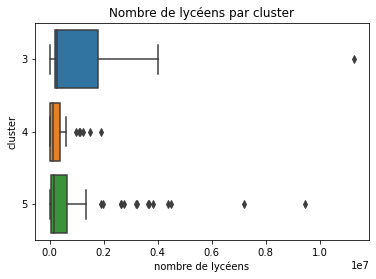

In [85]:
# Nombre de lycéens (boxplot)
plt.figure()
sns.boxplot(x=dataClusterB["Enrolment in upper secondary education, both sexes (number)"], y=dataClusterB["cluster"], orient="h")
plt.title("Nombre de lycéens par cluster")
plt.xlabel("nombre de lycéens")
plt.ylabel("cluster")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

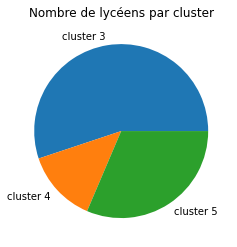

In [86]:
# Nombre de lycéens (pieplot)
plt.figure()
label = "cluster 3", "cluster 4", "cluster 5"
plt.pie(dataClusterB["Enrolment in upper secondary education, both sexes (number)"].groupby(dataClusterB["cluster"]).mean(), labels=label)
plt.title("Nombre de lycéens par cluster")
plt.show

##### Conclusion quant au nombre de lycéens :

##### Évolution du nombre de Lycéens :

<function matplotlib.pyplot.show(close=None, block=None)>

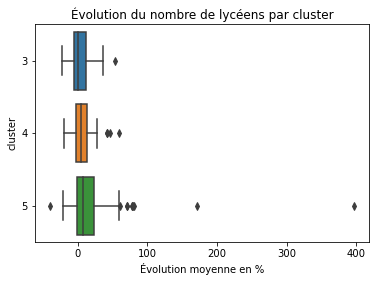

In [87]:
# Évolution du nombre de lycéens (boxplot)
plt.figure()
sns.boxplot(x=dataClusterB["Évolution lycéens"]*100, y=dataClusterB["cluster"], orient="h")
plt.title("Évolution du nombre de lycéens par cluster")
plt.xlabel("Évolution moyenne en %")
plt.ylabel("cluster")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

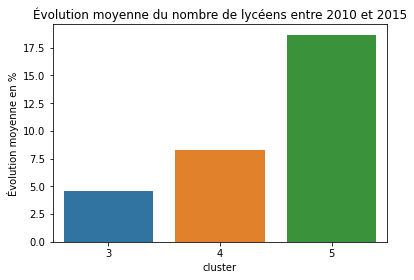

In [88]:
# Évolution moyenne du nombre de lycéens (barplot)
plt.figure()
sns.barplot(x=dataClusterB["cluster"], y=dataCluster["Évolution lycéens"]*100, ci=None)
plt.title("Évolution moyenne du nombre de lycéens entre 2010 et 2015")
plt.xlabel("cluster")
plt.ylabel("Évolution moyenne en %")
plt.show

##### Conclusion quant à l'évolution du nombre de lycéens :

##### PIB :

<function matplotlib.pyplot.show(close=None, block=None)>

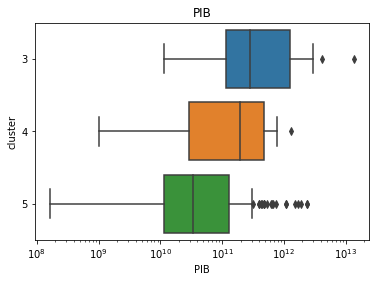

In [89]:
# PIB (boxplot)
plt.figure()
sns.boxplot(x=dataClusterB["GDP, PPP (current international $)"], y=dataClusterB["cluster"], orient="h")
plt.title("PIB")
plt.xlabel("PIB")
plt.ylabel("cluster")
plt.xscale("log")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

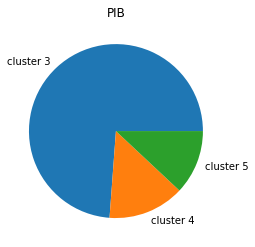

In [90]:
# PIB (pieplot)
plt.figure()
label = "cluster 3", "cluster 4", "cluster 5"
plt.pie(dataClusterB["GDP, PPP (current international $)"].groupby(dataClusterB["cluster"]).mean(), labels=label)
plt.title("PIB")
plt.show

##### Conclusion quant au PIB :

##### Équipement en ordinateurs personnels :

<function matplotlib.pyplot.show(close=None, block=None)>

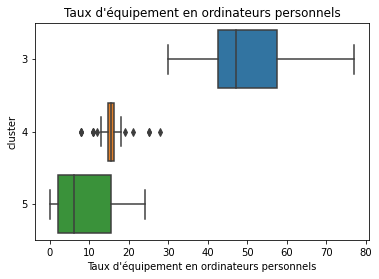

In [91]:
# Taux d'équipement en ordinateurs personnels (boxplot)
plt.figure()
sns.boxplot(x=dataClusterB["Personal computers (per 100 people)"], y=dataClusterB["cluster"], orient="h")
plt.title("Taux d'équipement en ordinateurs personnels")
plt.xlabel("Taux d'équipement en ordinateurs personnels")
plt.ylabel("cluster")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

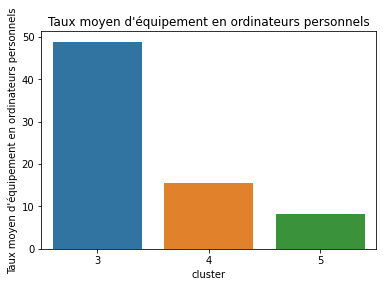

In [92]:
# Taux moyen d'équipement en ordinateurs personnels (barplot)
plt.figure()
sns.barplot(x=dataClusterB["cluster"], y=dataCluster["Personal computers (per 100 people)"], ci=None)
plt.title("Taux moyen d'équipement en ordinateurs personnels")
plt.xlabel("cluster")
plt.ylabel("Taux moyen d'équipement en ordinateurs personnels")
plt.show

##### Conclusion quant à l'équipement informatique :

##### Connexion à internet :

<function matplotlib.pyplot.show(close=None, block=None)>

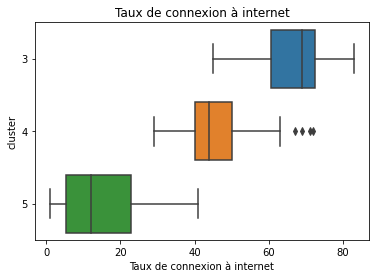

In [93]:
# Taux de connexion à internet (boxplot)
plt.figure()
sns.boxplot(x=dataClusterB["Internet users (per 100 people)"], y=dataClusterB["cluster"], orient="h")
plt.title("Taux de connexion à internet")
plt.xlabel("Taux de connexion à internet")
plt.ylabel("cluster")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

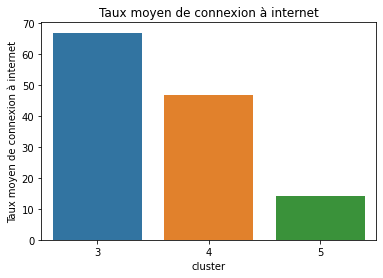

In [94]:
# Taux moyen de connexion à internet (barplot)
plt.figure()
sns.barplot(x=dataClusterB["cluster"], y=dataCluster["Internet users (per 100 people)"], ci=None)
plt.title("Taux moyen de connexion à internet")
plt.xlabel("cluster")
plt.ylabel("Taux moyen de connexion à internet")
plt.show

##### Conclusion quant à la connexion à internet :

##### Aperçu du cluster 3 classé en fonction du PIB :

In [100]:
# Cluster 3 classé en fonction du PIB :
dataClusterB[dataClusterB["cluster"]==3].sort_values(by="GDP, PPP (current international $)",ascending=False)

,Country Name,"Enrolment in upper secondary education, both sexes (number)",Évolution lycéens,"GDP, PPP (current international $)",Personal computers (per 100 people),Internet users (per 100 people),cluster
158,United States,11274648.0,0.002994,1.380811e+13,67.0,65.0,3
75,Japan,4006423.0,0.007215,4.211679e+12,35.0,66.0,3
57,Germany,2757077.0,-0.060691,2.965151e+12,46.0,66.0,3
55,France,2624079.0,-0.009871,2.124265e+12,42.0,55.0,3
157,United Kingdom,3190762.0,0.361764,2.088448e+12,50.0,69.0,3
80,"Korea, Rep.",1911023.0,-0.033405,1.293938e+12,49.0,72.0,3
31,Canada,1666225.0,-0.155070,1.240017e+12,60.0,72.0,3
110,Netherlands,673708.0,0.046340,6.713523e+11,58.0,77.0,3
146,Switzerland,297242.0,0.112119,3.684732e+11,77.0,72.0,3
145,Sweden,450858.0,0.272734,3.519298e+11,66.0,80.0,3


##### Aperçu du cluster 4 classé en fonction du PIB :

In [99]:
# Cluster 4 classé en fonction du PIB :
dataClusterB[dataClusterB["cluster"]==4].sort_values(by="GDP, PPP (current international $)",ascending=False)

,Country Name,"Enrolment in upper secondary education, both sexes (number)",Évolution lycéens,"GDP, PPP (current international $)",Personal computers (per 100 people),Internet users (per 100 people),cluster
138,Spain,1225189.0,0.416564,1.299262e+12,25.000000,50.0,4
8,Australia,1110435.0,0.114245,7.722928e+11,15.544643,69.0,4
123,Poland,1910701.0,0.052678,6.674562e+11,11.000000,43.0,4
5,Argentina,1505437.0,0.132999,6.351224e+11,8.000000,31.0,4
94,Malaysia,1073125.0,0.422186,5.072337e+11,16.000000,48.0,4
7,Aruba,3804.0,0.237158,4.693847e+11,15.544643,44.0,4
102,Monaco,1314.0,-0.002226,4.693847e+11,15.544643,67.0,4
32,Cayman Islands,1270.0,-0.019608,4.693847e+11,15.544643,63.0,4
87,Liechtenstein,1537.0,0.184298,4.693847e+11,15.544643,71.0,4
3,Andorra,1053.0,0.054873,4.693847e+11,15.544643,57.0,4


#### 3 - Conclusion générale :

#### 4 - Aperçu de l'évolution du nombre d'étudiants pour les dix pays choisis :

In [97]:
# Constitution d'un dataframe "top10"
top10 = evoLyc.loc[["United States","Japan","Germany","France","United Kingdom","Korea, Rep.","Canada","Spain","Australia","Poland"]]
top10.drop(columns=["Country Code","Indicator Code","Indicator Name","Region","Moyenne","Évolution lycéens"],inplace=True)
top10 = top10.T

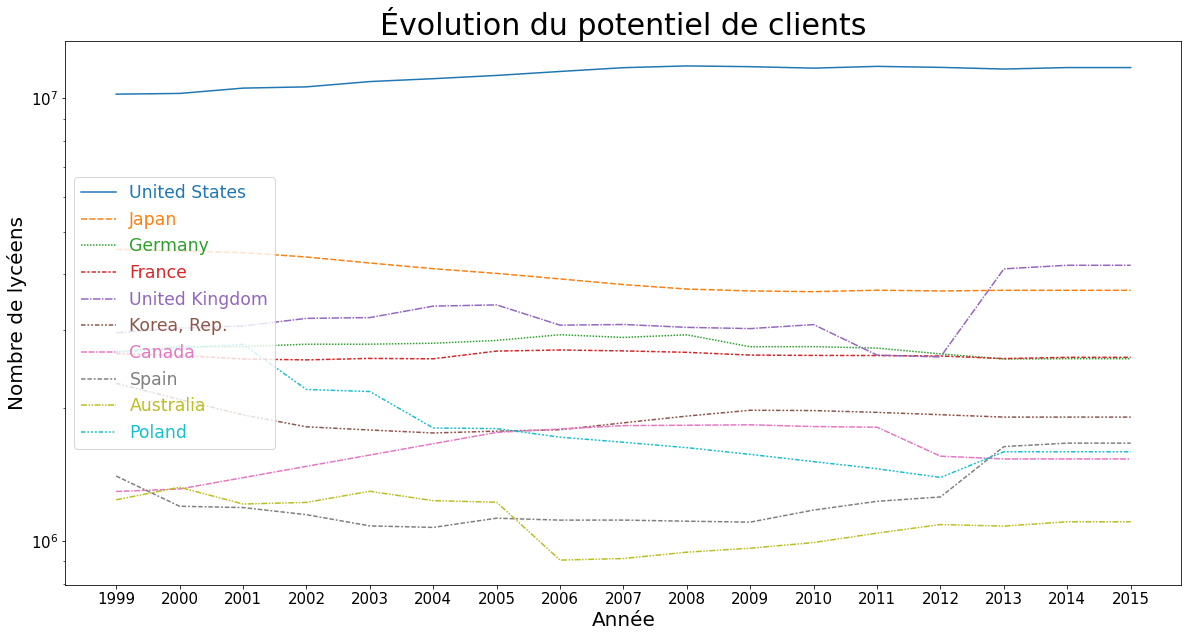

In [98]:
# Visualisation de l'évolution du potentiel client
plt.figure(figsize=(20,10))
sns.lineplot(data=top10)
plt.title("Évolution du potentiel de clients",size=30)
plt.tick_params(labelsize=15)
plt.xlabel("Année", size=20)
plt.ylabel("Nombre de lycéens", size=20)
plt.yscale("log")
plt.legend(fontsize="xx-large", labelcolor="linecolor", loc="center left")